# **<font color='#facb4b'>APRENDIZAGEM NÃO SUPERVISIONADA</font>**

**<font color='#facb4b'>PROBLEMA</font>**: 

HELP International é uma ONG humanitária internacional que está comprometida em combater a pobreza e fornecer às pessoas de países atrasados comodidades básicas e alívio durante o tempo de desastres e calamidades naturais.

A HELP International conseguiu arrecadar cerca de US$ 10 milhões. Agora, o CEO da ONG precisa distribuir esse dinheiro de forma estratégica e eficaz para os países mais carentes de ajuda humanitária.

**<font color='#facb4b'>OBJETIVO</font>**: Categorizar os países carentes de recursos humanitários com base em fatores socioeconômicos e de saúde, com o intuito de contribuir com a tomada de decisão do CEO.


**<font color='#facb4b'>METODOLOGIA</font>**: A metodologia utilizada para o desenvolvimento do projeto consiste nas seguintes etapas: análise exploratória dos dados, pré-processamento dos dados e clusterização com o K-Means. O valor de inércia do K-means será avaliado sem e com a redução de dimensionalidade (PCA). Para determinar o número de clusters (K) ideal para o K-means, será utilizado o método Elbow. A visulização Silhouette também será utilizada, pois ela exibe o coeficiente de silhueta para cada amostra por cluster, visualizando quais clusters são densos e quais não são. Isso é particularmente útil para determinar o desequilíbrio do cluster ou para selecionar um valor para K.

### **<font color='#facb4b'>IMPORTANDO AS BIBLIOTECAS</font>** 

In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

### **<font color='#facb4b'>LENDO A BASE DE DADOS</font>** 

In [78]:
dt = pd.read_csv("Country-data.csv")
dt.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### **<font color='#facb4b'>VERIFICANDO A DIMENSÃO DA BASE DE DADOS</font>** 

In [79]:
dt.shape

(167, 10)

* **<font color='#3CB371'>A base de dados possui 167 linhas e 10 variáveis</font>**

### **<font color='#facb4b'>DESCRIÇÃO DAS FEATURES</font>** 
1. **<font color='#3CB371'>country</font>**: Nome do país.
2. **<font color='#3CB371'>child_mort</font>**: Morte de crianças menores de 5 anos por 1000 nascidos vivos.
3. **<font color='#3CB371'>exports</font>**: Exportações de bens e serviços per capita. Dado como % do PIB per capita.
4. **<font color='#3CB371'>health</font>**: Gasto total em saúde per capita. Dado como % do PIB per capita.
5. **<font color='#3CB371'>imports</font>**: Importações de bens e serviços per capita. Dado como % do PIB per capita.
6. **<font color='#3CB371'>income</font>**: Renda líquida por pessoa.
7. **<font color='#3CB371'>inflation</font>**: A medida da taxa de crescimento anual do PIB Total.
8. **<font color='#3CB371'>life_expec</font>**: O número médio de anos que uma criança recém-nascida viveria se os padrões atuais de mortalidade permanecessem os mesmos.
9. **<font color='#3CB371'>total_fer</font>**: O número de filhos que nasceriam de cada mulher se as taxas atuais de fertilidade por idade permanecerem as mesmas.
10. **<font color='#3CB371'>gdpp</font>**: PIB per capita. Calculado como o PIB total dividido pela população total.

### **<font color='#facb4b'>VERIFICANDO OS TIPOS DE DADOS</font>** 

In [80]:
dt.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [81]:
dt["country"].value_counts()

Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: country, Length: 167, dtype: int64

* **<font color='#3CB371'>Os dados são do tipo discreto e contínuo.</font>** 
* **<font color='#3CB371'>A variável "country" é categórica nominal, isso indica que as demais variáveis são caraterísticas que descrevem cada país.</font>**

### **<font color='#facb4b'>VERIFICANDO VALORES AUSENTES</font>** 

In [82]:
dt.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

* **<font color='#3CB371'>A base de dados não possui valores ausentes</font>**

### **<font color='#facb4b'>VERIFICANDO VALORES DUPLICADOS</font>** 

In [83]:
dt.duplicated().sum()

0

* **<font color='#3CB371'>A base de dados não possui valores duplicados</font>**

### **<font color='#facb4b'>ESTATÍSTICA DESCRITIVA DOS DADOS</font>** 

In [84]:
dt.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


* **<font color='#3CB371'>Os dados não estão na mesma escala. Portanto, é necessário normalizar os dados.</font>**

### **<font color='#facb4b'>DISTRIBUIÇÃO DOS DADOS</font>** 

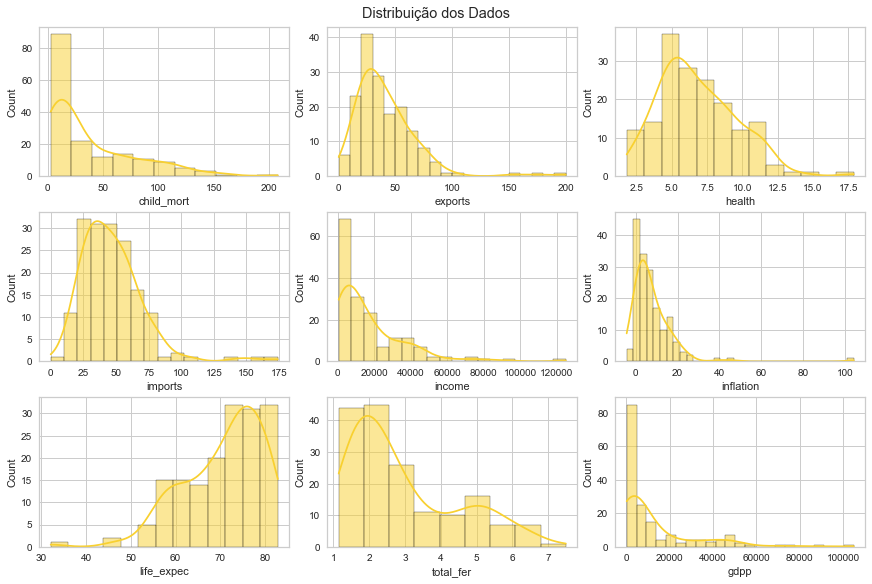

In [85]:
cols = dt.select_dtypes(exclude='object').columns.tolist()

fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(12,8), constrained_layout=True)
ax = ax.flatten()
plt.suptitle("Distribuição dos Dados")
for x, i in enumerate(cols):
    sns.histplot(x=dt[i], ax=ax[x], kde=True, color=['#F8D030'])

* **<font color='#3CB371'>Os gráficos mostram que os dados não apresentam uma distribuição normal.</font>**

### **<font color='#facb4b'>DETECTANDO OUTLIERS</font>** 

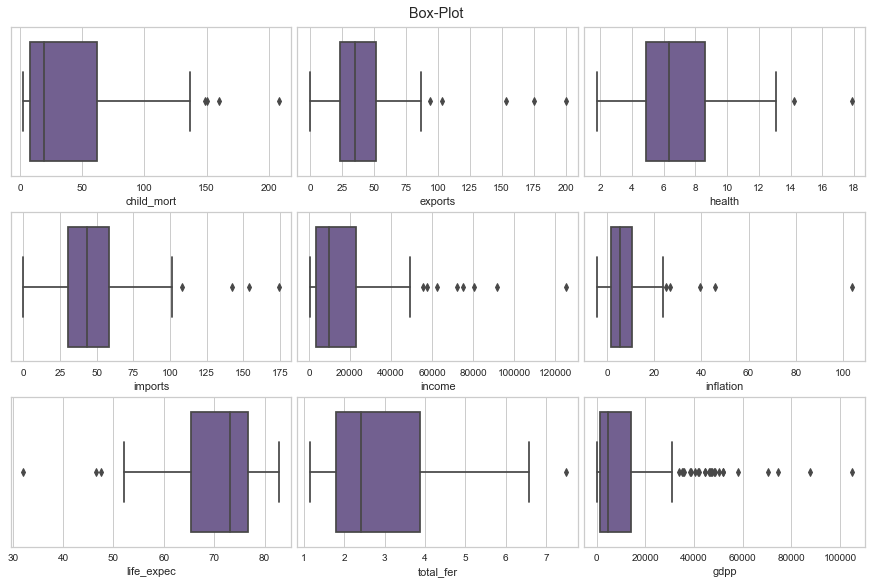

In [86]:
cols = dt.select_dtypes(exclude='object').columns.tolist()

fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(12,8), constrained_layout=True)
ax = ax.flatten()
plt.suptitle("Box-Plot")
for x, i in enumerate(cols):
    sns.boxplot(x=dt[i], ax=ax[x], palette=['#705898'])

* **<font color='#3CB371'>Os gráficos de Box-Plot mostram que existem valores discrepantes em todas as variáveis númericas. </font>**
* **<font color='#3CB371'>No entanto, esses valores pertencem a países diferentes. Portanto, é natural que exista valores que fujam da normalidade.</font>**

### **<font color='#facb4b'>CORRELAÇÃO</font>** 

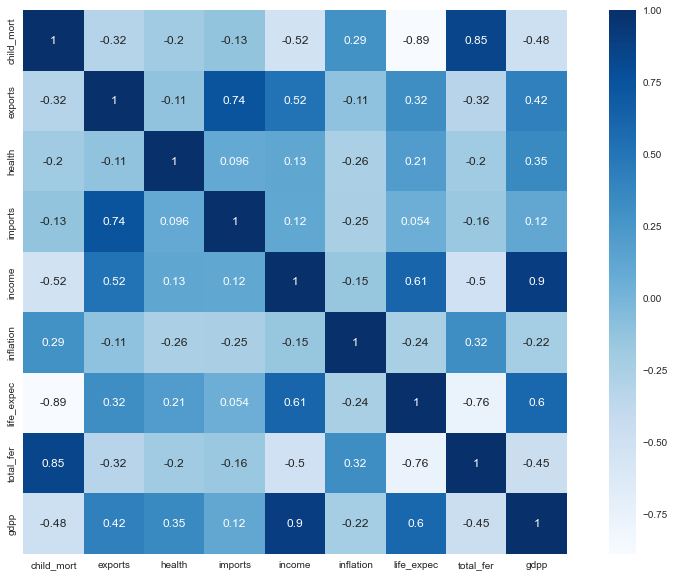

In [87]:
plt.figure(figsize=(15,10))
sns.heatmap(dt.corr(), annot=True, square=True, cmap="Blues")
plt.show()

**Observações**
1. **<font color='#3CB371'>child_mort</font>** e  **<font color='#3CB371'>total_fer</font>** tem relação negativa forte com o **<font color='#3CB371'>gdpp (PIB)</font>**, isso indica que quando PIB cresce a mortalidade infantil e o número de filhos diminuiu e quando o PIB diminiu a mortalidade infantil aumenta, assim como, o número de filhos que nasce de cada mulher.
2. **<font color='#3CB371'>exports, health, income</font>** e **<font color='#3CB371'>life_expec</font>** tem uma relação positiva com o **<font color='#3CB371'>gdpp (PIB)</font>**, isso indica que na medida que o PIB cresce esses fatores também crescem juntos.
3. **<font color='#3CB371'>child_mort</font>** tem relação positiva com **<font color='#3CB371'>total_fer</font>**, indicando que quando o número de filhos por mulher crescre a mortalidade infantil também cresce.
4. **<font color='#3CB371'>child_mort</font>** tem relação negativa com **<font color='#3CB371'>life_expec</font>**, isso indica que quando a expectativa de vida cresce, a mortalidade infantil diminiu.
5. **<font color='#3CB371'>life_expec</font>** tem relação negativa com **<font color='#3CB371'>total_fer</font>**, quando a expectativa de vida cresce o número de filhos por mulher diminui.
6. **<font color='#3CB371'>income</font>** tem relação positiva com **<font color='#3CB371'>life_expec</font>**, quando a rende líquida por pessoa aumenta a expectativa de vida também aumenta.
7. **<font color='#3CB371'>exports</font>** tem relação positiva com **<font color='#3CB371'>income</font>**, quando as exportações do país aumenta a renda líquida de cada pessoa também aumenta.


* Constata-se que os fatores **<font color='#3CB371'>child_mort, total_fer, exports, health, income e life_expec</font>** desempenham um papel vital no status socioeconômico de um país. 
* Com base nisso, a decisão de escolher um país que necessita de ajuda também é baseado nesse fatores. 

### **<font color='#facb4b'>VISUALIZANDO OS 5 PRINCIPAIS PAÍSES QUE APRESENTAM VALORES ALTOS PARA TODAS AS VARIÁVEIS</font>** 

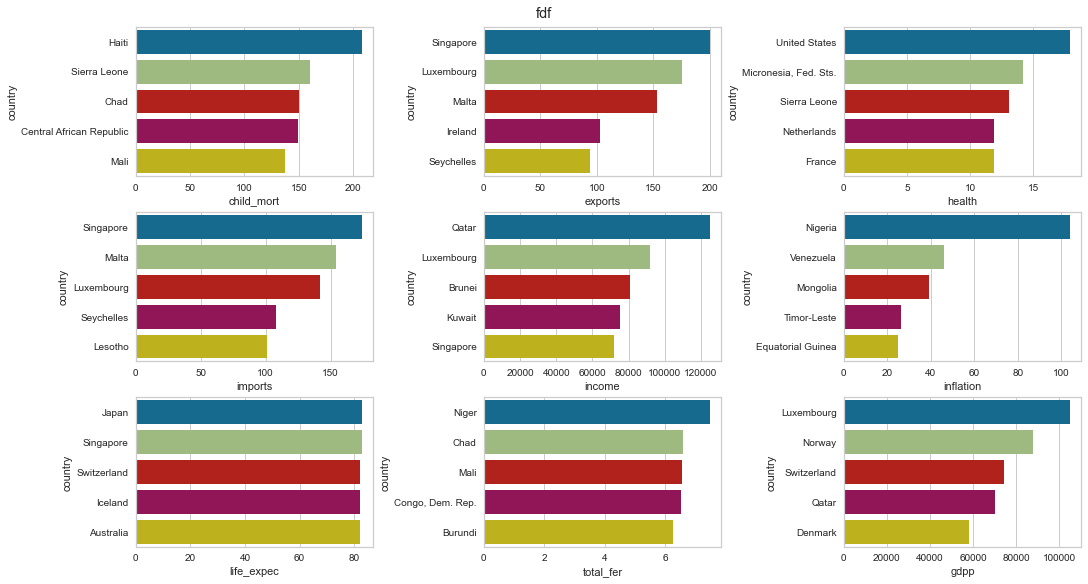

In [88]:
cols = dt.drop(['country'], axis=1).columns.tolist()

fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
ax = ax.flatten()
plt.suptitle("fdf")
for x, i in enumerate(cols):
    dt_new = dt[['country', i]].sort_values(by=i,ascending=False)
    dt_new = dt_new.iloc[0:5,:]
    sns.barplot(data=dt_new, x=i, y='country', ax=ax[x])
    

### **<font color='#facb4b'>VISUALIZANDO OS 5 PRINCIPAIS PAÍSES QUE APRESENTAM VALORES BAIXOS PARA TODAS AS VARIÁVEIS</font>** 

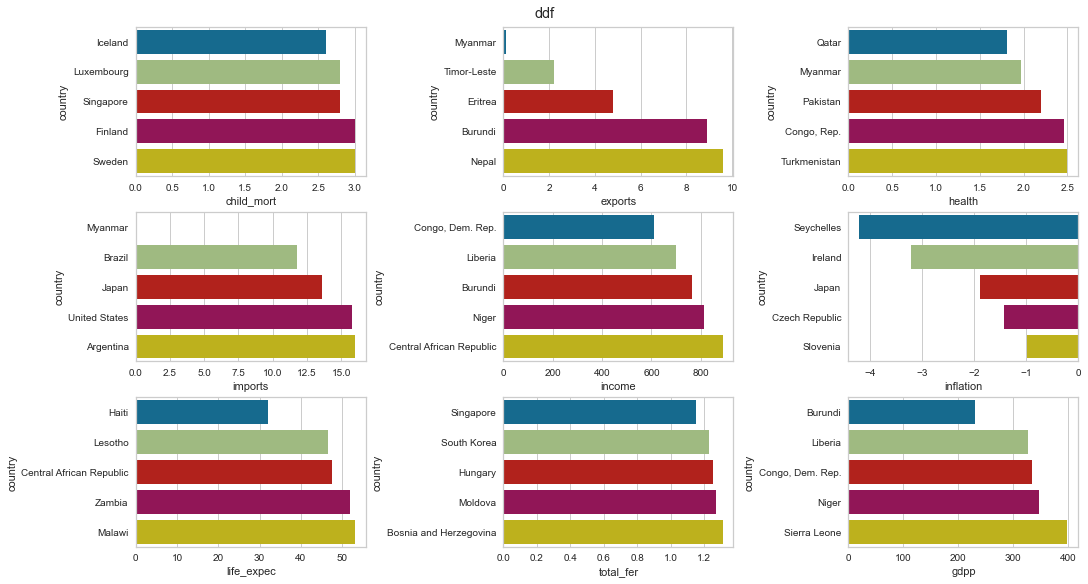

In [89]:
cols = dt.drop(['country'], axis=1).columns.tolist()

fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
ax = ax.flatten()
plt.suptitle("ddf")
for x, i in enumerate(cols):
    dt_new = dt[['country', i]].sort_values(by=i,ascending=True)
    dt_new = dt_new.iloc[0:5,:]
    sns.barplot(data=dt_new, x=i, y='country', ax=ax[x])
    